# Import libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
# Plot style
plt.style.use('fivethirtyeight')

In [2]:
# Check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Turn project folder path into a string
path = r'/Users/peterreadman/Desktop/Python Projects/PortfolioProjects/HealthcareSpending/'

In [5]:
# import person data

df_p_orig = pd.read_csv(os.path.join(path,'02 Data','02a Original Data', 'ASEC_2022', 'pppub22.csv'))

In [6]:
df_p_orig.shape

(152732, 832)

# Exploratory Data Analysis
## i) Out-of-pocket medical expenses by gender (m/f)

### Reduce columns to those useful for exploration, include:
- age
- sex (m/f)
- Total out-of-pocket med expenses
- self-employment income
- wages/salary income

In [7]:
# Define the renaming code in a list
column_renaming = [
    ('PERIDNUM', 'Person_ID'),
    ('A_AGE', 'Age'),
    ('A_SEX', 'Sex'),
    ('PEMLR', 'Emp'),
    ('A_CLSWKR', 'Emp_Type'),
    ('PRCOW1', 'Emp_Type_recode'),
    ('ANN_VAL', 'Retirement_Ann'),
    ('DBTN_VAL', 'Retirement_Dist'),
    ('ERN_VAL', 'Earnings_Net'),
    ('FRM_VAL', 'SE_FARM_2nd'),
    ('FRSE_VAL', 'SE_FARM_Tot'),
    ('MOOP', 'Total_OutOfPocket_Med_Exp'),
    ('MOOP2', 'Total_OutOfPocket_Med_Exp_2'),
    ('PEMCPREM', 'Medicare_Premium'),
    ('PHIP_VAL', 'Ins_Premium'),
    ('PHIP_VAL2', 'Ins_Premium_2'),
    ('PMED_VAL', 'Non_Premium_OutOfPocket'),
    ('POTC_VAL', 'OverTheCounter_Exp'),
    ('PTOTVAL', 'Tot_Per_Income'),
    ('SEMP_VAL', 'SE_Tot'),
    ('SE_VAL', 'SE_2nd'),
    ('WSAL_VAL', 'Wages_Tot'),
    ('WS_VAL', 'Wages_Other')
]

# Extract the renamed columns into a new dataframe 'df_p'
df_p = pd.DataFrame()

for current_name, new_name in column_renaming:
    df_p[new_name] = df_p_orig[current_name]

# Print the new dataframe 'df_p'
df_p.head()

,Person_ID,Age,Sex,Emp,Emp_Type,Emp_Type_recode,Retirement_Ann,Retirement_Dist,Earnings_Net,SE_FARM_2nd,...,Medicare_Premium,Ins_Premium,Ins_Premium_2,Non_Premium_OutOfPocket,OverTheCounter_Exp,Tot_Per_Income,SE_Tot,SE_2nd,Wages_Tot,Wages_Other
0,2022093493100051201101,42,1,1,1,4,0,0,44200,0,...,0,3840,3840,0,0,44220,0,0,44200,0
1,2100059324402431401101,62,1,1,6,5,0,0,30000,2500,...,0,200,200,320,48,32702,30100,100,0,0
2,2100059324402431401102,64,2,2,3,2,0,0,48000,0,...,0,1200,1200,0,100,50050,0,0,48000,0
3,1410320300869091411101,26,1,1,1,4,0,0,40000,0,...,0,0,0,0,100,40001,0,0,40000,0
4,1410320300869091411102,24,2,2,1,4,0,0,20000,0,...,0,1000,1000,300,100,20000,0,0,20000,0


### Calculate summary stats for total out-of-pocket expenses by sex (m/f)

In [8]:
# Change 'Sex' values to m/f
df_p['Sex'] = df_p['Sex'].replace({1: 'm', 2: 'f'})

In [9]:
# Total_OutOfPocket_Med_Exp by sex (m/f) 

total_exp_by_sex = df_p.groupby('Sex')['Total_OutOfPocket_Med_Exp'].sum()
print(total_exp_by_sex)

Sex
f    134646453
m    137138184
Name: Total_OutOfPocket_Med_Exp, dtype: int64


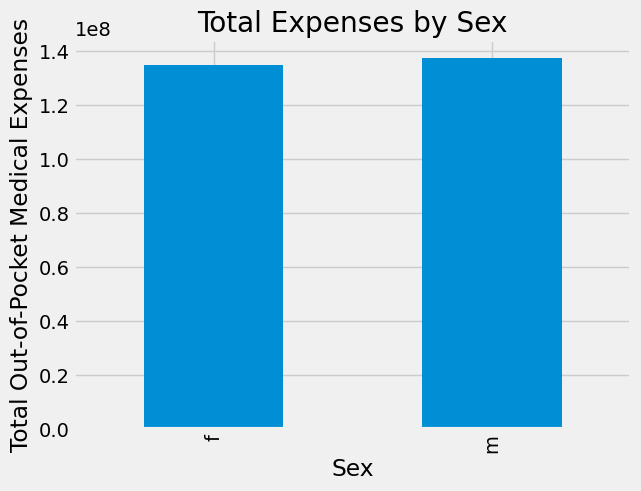

In [10]:
# Assuming you have the result stored in the 'total_exp_by_sex' variable
total_exp_by_sex.plot(kind='bar')

# Customize the chart
plt.xlabel('Sex')
plt.ylabel('Total Out-of-Pocket Medical Expenses')
plt.title('Total Expenses by Sex')

# Display the chart
plt.show()

In [11]:
# Total_OutOfPocket_Med_Exp by self-employed vs wages/salary

total_exp_by_employment = df_p.groupby('Sex')['Total_OutOfPocket_Med_Exp'].sum()
print(total_exp_by_sex)

Sex
f    134646453
m    137138184
Name: Total_OutOfPocket_Med_Exp, dtype: int64


## What percentage of annual income are persons spending on out-of-pocket costs?

In [12]:
# Remove rows with Tot_Per_Income == 0 to avoid infinity restults later on
df_p = df_p[df_p['Tot_Per_Income'] != 0]

In [13]:
# Create the 'perc_inc_oup' column
df_p.loc[:, 'perc_inc_oup'] = (df_p['Total_OutOfPocket_Med_Exp'] / df_p['Tot_Per_Income']) * 100

In [14]:
df_p['perc_inc_oup'].head()

0    8.683853
1    1.736897
2    2.597403
3    0.249994
4    7.000000
Name: perc_inc_oup, dtype: float64

In [15]:
# summary stats
df_p['perc_inc_oup'].describe()

count    1.066430e+05
mean     1.475627e+03
std      3.256235e+04
min     -4.750000e+05
25%      4.816212e-01
50%      2.449060e+00
75%      7.812500e+00
max      6.015000e+06
Name: perc_inc_oup, dtype: float64

#### How many persons' out-of-pocket expenses exceeded their annual income?

In [16]:
# Count of rows where 'Total_OutOfPocket_Med_Exp' > 'Tot_Per_Earn'
(df_p['Total_OutOfPocket_Med_Exp'] > df_p['Tot_Per_Income']).sum()

4078

In [17]:
df_p.shape

(106643, 24)

In [18]:
num_rows = 106643

In [19]:
(4078/num_rows) * 100

3.8239734441079114

### Observation
#### 3.83% of persons with annual income > 0 had out-of-pocket med expenses greater than their annual income

## Explore Employment type (private, self-employed, government, etc) and out-of-pocket costs

In [20]:
# Translate ASEC data dictionary for Employment type codes

# Define the dictionary to map numerical values to text codes

emp_type_mapping = {
    0: 'niu',
    1: 'private',
    2: 'gov_fed',
    3: 'gov_state',
    4: 'gov_loc',
    5: 'SE_inc',
    6: 'SE',
    7: 'no_pay',
    8: 'never_worked'
}

# Replace the numerical values with text codes in 'Emp_Type' column
df_p['Emp_Type'] = df_p['Emp_Type'].replace(emp_type_mapping)

In [21]:
df_p['Emp_Type'].value_counts()

private         54621
niu             33807
SE               4691
gov_loc          4691
gov_state        3714
SE_inc           2874
gov_fed          2153
never_worked       66
no_pay             26
Name: Emp_Type, dtype: int64

#### Note that 'niu' (Not In Universe) refers to Not in universe or children and Armed Forces
- I am surprised such a large proportion of the ASEC data are not in universe

In [22]:
# Translate ASEC data dictionary for Employment type 'recode' codes

# Define the dictionary to map numerical values to text codes

emp_type_recode_mapping = {
    0: 'niu',
    1: 'gov_fed',
    2: 'gov_state',
    3: 'gov_loc',
    4: 'private',
    5: 'SE',
    6: 'no_pay'
}

# Replace the numerical values with text codes in 'Emp_Type' column
df_p['Emp_Type_recode'] = df_p['Emp_Type_recode'].replace(emp_type_recode_mapping)

In [23]:
df_p['Emp_Type_recode'].value_counts()

private      57495
niu          33873
SE            4691
gov_loc       4691
gov_state     3714
gov_fed       2153
no_pay          26
Name: Emp_Type_recode, dtype: int64

#### OK this looks more useful

### Get value counts for overall employment status

In [24]:
# PEMLR is Employment recode (Emp)
# Dictionary:

# Translate ASEC data dictionary for Employment recode codes

# Define the dictionary to map numerical values to text codes

emp_mapping = {
    0: 'niu',
    1: 'Emp_at_work',
    2: 'Emp_absent',
    3: 'Unemp_layoff',
    4: 'Unemp_looking',
    5: 'NotWorking_retired',
    6: 'NotWorking_disabled',
    7: 'NotWorking_other'
}

# Replace the numerical values with text codes in 'Emp' column
df_p['Emp'] = df_p['Emp'].replace(emp_mapping)

In [25]:
df_p['Emp'].value_counts()

Emp_at_work            67877
NotWorking_retired     21029
NotWorking_other        8261
NotWorking_disabled     4714
Emp_absent              2130
Unemp_looking           1755
niu                      491
Unemp_layoff             386
Name: Emp, dtype: int64

### Work with the 'Emp_Type_recode' column

In [26]:
# Create a new df without the 'niu' rows

df_emp = df_p[df_p['Emp'] != 'niu'].copy()

# value counts for 'Employment'
df_emp['Emp'].value_counts()

Emp_at_work            67877
NotWorking_retired     21029
NotWorking_other        8261
NotWorking_disabled     4714
Emp_absent              2130
Unemp_looking           1755
Unemp_layoff             386
Name: Emp, dtype: int64

In [27]:
df_emp.columns

Index(['Person_ID', 'Age', 'Sex', 'Emp', 'Emp_Type', 'Emp_Type_recode',
       'Retirement_Ann', 'Retirement_Dist', 'Earnings_Net', 'SE_FARM_2nd',
       'SE_FARM_Tot', 'Total_OutOfPocket_Med_Exp',
       'Total_OutOfPocket_Med_Exp_2', 'Medicare_Premium', 'Ins_Premium',
       'Ins_Premium_2', 'Non_Premium_OutOfPocket', 'OverTheCounter_Exp',
       'Tot_Per_Income', 'SE_Tot', 'SE_2nd', 'Wages_Tot', 'Wages_Other',
       'perc_inc_oup'],
      dtype='object')

In [28]:
# Calculate the aggregates separately
max_tot_oup = df_emp.groupby('Emp')['Total_OutOfPocket_Med_Exp'].max()
min_tot_oup = df_emp.groupby('Emp')['Total_OutOfPocket_Med_Exp'].min()
mean_tot_oup = df_emp.groupby('Emp')['Total_OutOfPocket_Med_Exp'].mean()

max_perc_inc = df_emp.groupby('Emp')['perc_inc_oup'].max()
min_perc_inc = df_emp.groupby('Emp')['perc_inc_oup'].min()
mean_perc_inc = df_emp.groupby('Emp')['perc_inc_oup'].mean()

# Create a DataFrame from the aggregates
aggregates = pd.DataFrame({
    'Max_Total_OutOfPocket_Med_Exp': max_tot_oup,
    'Min_Total_OutOfPocket_Med_Exp': min_tot_oup,
    'Mean_Total_OutOfPocket_Med_Exp': mean_tot_oup,
    'Max_perc_inc_oup': max_perc_inc,
    'Min_perc_inc_oup': min_perc_inc,
    'Mean_perc_inc_oup': mean_perc_inc
})

# Display the aggregates table
print(aggregates)

                     Max_Total_OutOfPocket_Med_Exp  \
Emp                                                  
Emp_absent                                   84250   
Emp_at_work                                 240050   
NotWorking_disabled                          50250   
NotWorking_other                             75500   
NotWorking_retired                          240437   
Unemp_layoff                                 18600   
Unemp_looking                                36000   

                     Min_Total_OutOfPocket_Med_Exp  \
Emp                                                  
Emp_absent                                       0   
Emp_at_work                                      0   
NotWorking_disabled                              0   
NotWorking_other                                 0   
NotWorking_retired                               0   
Unemp_layoff                                     0   
Unemp_looking                                    0   

                     Mean_

# Match Person with Household for Geography

#### ID'ing Persons within a Household
To uniquely identify persons within a household
- use PH_SEQ and PPPOS on the person file
- Match PH_SEQ to H_SEQ on the household file, to link the persons to the household
- PPPOS is the person id within each household

For example, match PH_SEQ = 12345 to H_SEQ = 12345, and then use PPPOS, which will have values of
01, 02, ...16, to identify each person.

In [29]:
# import person data

df_h_orig = pd.read_csv(os.path.join(path,'02 Data','02a Original Data', 'ASEC_2022', 'hhpub22.csv'))

In [30]:
df_h_orig.shape

(89197, 144)

In [31]:
df_p_orig[['PH_SEQ','PPPOS']].head()

,PH_SEQ,PPPOS
0,1,41
1,5,41
2,5,42
3,6,41
4,6,42


In [32]:
df_h_orig['H_SEQ'].head(50)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
42    43
43    44
44    45
45    46
46    47
47    48
48    49
49    50
Name: H_SEQ, dtype: int64

In [33]:
df_ph_22 = df_p_orig.merge(df_h_orig, left_on='PH_SEQ', right_on='H_SEQ', how='left')

In [34]:
df_ph_22.shape

(152732, 976)

## Rename columns in merged dataframe for analysis. This needs to include all the columns required, so keep it updated

In [35]:
# Define the renaming code in a list
ph_column_renaming = [
    ('PERIDNUM', 'Person_ID'),
    ('PH_SEQ', 'Household_ID'),
    ('PPPOS', 'Per_ID_WithinHH'),
    ('A_AGE', 'Age'),
    ('A_SEX', 'Sex'),
    ('PRDTRACE', 'Race'),
    ('PEMLR', 'Emp'),
    ('A_CLSWKR', 'Emp_Type'),
    ('PRCOW1', 'Emp_Type_recode'),
    ('ANN_VAL', 'Retirement_Ann'),
    ('DBTN_VAL', 'Retirement_Dist'),
    ('ERN_VAL', 'Earnings_Net'),
    ('FRM_VAL', 'SE_FARM_2nd'),
    ('FRSE_VAL', 'SE_FARM_Tot'),
    ('MOOP', 'Total_OutOfPocket_Med_Exp'),
    ('MOOP2', 'Total_OutOfPocket_Med_Exp_2'),
    ('PEMCPREM', 'Medicare_Premium'),
    ('PHIP_VAL', 'Ins_Premium'),
    ('PHIP_VAL2', 'Ins_Premium_2'),
    ('PMED_VAL', 'Non_Premium_OutOfPocket'),
    ('POTC_VAL', 'OverTheCounter_Exp'),
    ('PTOTVAL', 'Tot_Per_Income'),
    ('PTOT_R', 'Income_Bracket'),
    ('SEMP_VAL', 'SE_Tot'),
    ('SE_VAL', 'SE_2nd'),
    ('WSAL_VAL', 'Wages_Tot'),
    ('WS_VAL', 'Wages_Other'),
    ('GEREG', 'Region'),
    ('GESTFIPS', 'State_Code'),
    ('GTCBSA', 'Met_Code'),
    ('GTCBSASZ', 'City_Size'),
    ('GTCO', 'County_Code'),
    ('GTINDVPC', 'City_Code'),
    ('NOW_COV', 'Current_Coverage')
    
]

In [36]:
# Extract the renamed columns into a new dataframe 'df_ph'
df_ph = pd.DataFrame()

for current_name, new_name in ph_column_renaming:
    df_ph[new_name] = df_ph_22[current_name]

# Print the new dataframe 'df_p'
df_ph.head()

,Person_ID,Household_ID,Per_ID_WithinHH,Age,Sex,Race,Emp,Emp_Type,Emp_Type_recode,Retirement_Ann,...,SE_2nd,Wages_Tot,Wages_Other,Region,State_Code,Met_Code,City_Size,County_Code,City_Code,Current_Coverage
0,2022093493100051201101,1,41,42,1,1,1,1,4,0,...,0,44200,0,1,23,0,0,0,0,1
1,2100059324402431401101,5,41,62,1,1,1,6,5,0,...,100,0,0,1,23,0,0,0,0,1
2,2100059324402431401102,5,42,64,2,1,2,3,2,0,...,0,48000,0,1,23,0,0,0,0,1
3,1410320300869091411101,6,41,26,1,1,1,1,4,0,...,0,40000,0,1,23,0,0,0,0,2
4,1410320300869091411102,6,42,24,2,3,2,1,4,0,...,0,20000,0,1,23,0,0,0,0,2


## Map person to USA map

In [37]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/peterreadman/Desktop/Python Projects/PortfolioProjects/HealthcareSpending/02 Data/02a Original Data/us-states.json'


### 2a) Transform 'State_Code' column to 'State_Name'
Change 'State_Code' FIPS codes to State names to match JSON.
- 1 = Alabama
- 2 = Alaska
    
etc.

In [38]:
# Mapping dictionary for FIPS codes to state names

fips_to_state = {
    '1': 'Alabama',
    '2': 'Alaska',
    '4': 'Arizona',
    '5': 'Arkansas',
    '6': 'California',
    '8': 'Colorado',
    '9': 'Connecticut',
    '10': 'Delaware',
    '11': 'District of Columbia',
    '12': 'Florida',
    '13': 'Georgia',
    '15': 'Hawaii',
    '16': 'Idaho',
    '17': 'Illinois',
    '18': 'Indiana',
    '19': 'Iowa',
    '20': 'Kansas',
    '21': 'Kentucky',
    '22': 'Louisiana',
    '23': 'Maine',
    '24': 'Maryland',
    '25': 'Massachusetts',
    '26': 'Michigan',
    '27': 'Minnesota',
    '28': 'Mississippi',
    '29': 'Missouri',
    '30': 'Montana',
    '31': 'Nebraska',
    '32': 'Nevada',
    '33': 'New Hampshire',
    '34': 'New Jersey',
    '35': 'New Mexico',
    '36': 'New York',
    '37': 'North Carolina',
    '38': 'North Dakota',
    '39': 'Ohio',
    '40': 'Oklahoma',
    '41': 'Oregon',
    '42': 'Pennsylvania',
    '44': 'Rhode Island',
    '45': 'South Carolina',
    '46': 'South Dakota',
    '47': 'Tennessee',
    '48': 'Texas',
    '49': 'Utah',
    '50': 'Vermont',
    '51': 'Virginia',
    '53': 'Washington',
    '54': 'West Virginia',
    '55': 'Wisconsin',
    '56': 'Wyoming'
}

In [39]:
# Convert 'State_Code' column to string data type
df_ph['State_Code'] = df_ph['State_Code'].astype(str)

In [40]:
# Apply the mapping to create a new 'State_Name' column
df_ph['State_Code'] = df_ph['State_Code'].map(fips_to_state)

In [41]:
# Rename 'State_Code' column to 'State_Name'
df_ph = df_ph.rename(columns={'State_Code': 'State_Name'})

In [42]:
df_ph['State_Name'].value_counts()

California              14822
Texas                    9470
Florida                  7218
New York                 5703
Illinois                 4207
Pennsylvania             3818
Louisiana                3535
North Carolina           3497
Michigan                 3338
Georgia                  3337
Massachusetts            3314
Ohio                     3275
Alabama                  3203
Virginia                 3065
Utah                     2992
New Mexico               2842
Washington               2817
Arkansas                 2802
New Jersey               2775
Idaho                    2748
Hawaii                   2714
Mississippi              2690
Tennessee                2637
West Virginia            2635
South Carolina           2510
Arizona                  2499
Oklahoma                 2425
Indiana                  2390
Oregon                   2382
Montana                  2350
North Dakota             2244
District of Columbia     2229
Wyoming                  2199
Colorado  

# Set up dataframe for analysis with new variables
1. Total Out-of-Pocket expenses per person
2. Percentage of Income spent on Out-of-Pocket expenses
3. Income
4. Income bracket
5. Employment Type
6. Insurance Type
7. Sex
8. Age
9. Race
10. Location (State)

## 1. TotalOut-of-Pocket Expenses into one variable

In [43]:
len(df_ph[df_ph['Ins_Premium_2'] != 0])

52244

In [44]:
df_ph['Total_OutOfPocket_Med_Exp'].min()

0

In [45]:
# Ignore rows where 'Ins_Premium' and 'Ins_Premium_2' are both 0
df_filtered = df_ph[(df_ph['Ins_Premium'] != 0) | (df_ph['Ins_Premium_2'] != 0)]

# Count the number of rows where 'Ins_Premium' and 'Ins_Premium_2' are the same value
count_matching = len(df_filtered[df_filtered['Ins_Premium'] == df_filtered['Ins_Premium_2']])

# Count the number of rows where 'Ins_Premium' and 'Ins_Premium_2' are both greater than 0 but not equal to each other
count_not_matching = len(df_filtered[(df_filtered['Ins_Premium'] > 0) & (df_filtered['Ins_Premium_2'] > 0) & (df_filtered['Ins_Premium'] != df_filtered['Ins_Premium_2'])])

print("Number of rows where 'Ins_Premium' and 'Ins_Premium_2' have matching values:", count_matching)
print("Number of rows where 'Ins_Premium' and 'Ins_Premium_2' have different non-zero values:", count_not_matching)

Number of rows where 'Ins_Premium' and 'Ins_Premium_2' have matching values: 48879
Number of rows where 'Ins_Premium' and 'Ins_Premium_2' have different non-zero values: 453


#### Assumptions:
- remove rows where the values for 'Ins_Premium' and 'Ins_Premium_2' are both greater than 0 but different. Only 453 removals, so a small enough sample
- count only one value for rows where the same value has been entered into 'Ins_Premium' and 'Ins_Premium_2'

In [46]:
len(df_ph[(df_ph['Total_OutOfPocket_Med_Exp'] > 0) & (df_ph['Total_OutOfPocket_Med_Exp_2'] > 0) & (df_ph['Total_OutOfPocket_Med_Exp'] != df_ph['Total_OutOfPocket_Med_Exp_2'])])

2687

In [47]:
df_ph.shape

(152732, 34)

In [48]:
2687/152732

0.0175929078385669

#### Leave these in. Add them together

In [49]:
# Add a new column 'MOOP_tot' based on the conditions
df_ph['MOOP_tot'] = df_ph.apply(lambda row: row['Total_OutOfPocket_Med_Exp'] + row['Total_OutOfPocket_Med_Exp_2'] if row['Total_OutOfPocket_Med_Exp'] != row['Total_OutOfPocket_Med_Exp_2']
                                 else 0 if row['Total_OutOfPocket_Med_Exp'] + row['Total_OutOfPocket_Med_Exp_2'] == 0
                                 else row['Total_OutOfPocket_Med_Exp'], axis=1)


### Combine 'MOOP_tot' with 'Medicare_Premium' for single column of Out-of-Pocket

In [50]:
len(df_ph[(df_ph['Medicare_Premium'] > 0) & (df_ph['MOOP_tot'] > 0) & (df_ph['Medicare_Premium'] != df_ph['MOOP_tot'])])


17522

In [51]:
len(df_ph[(df_ph['Medicare_Premium'] > 0) & (df_ph['MOOP_tot'] > 0) & (df_ph['Medicare_Premium'] == df_ph['MOOP_tot'])])

24

In [52]:
# Create new column 'Out_of_Pocket' combining 'MOOP_tot' with 'Medicare_Premium'

df_ph['Out_of_Pocket'] = df_ph['MOOP_tot'] + df_ph['Medicare_Premium']

In [53]:
df_ph.shape

(152732, 36)

In [54]:
df_ph['Out_of_Pocket'].max()

256800

In [55]:
df_ph['Out_of_Pocket'].min()

0

## 2. Percentage of Income spent on Out-of-Pocket expenses

In [56]:
# New column 'Pct_Inc_oop' to store ('Out_of_Pocket' / 'Tot_Per_Income') * 100
# For 0 Income, I don't want to remove them since there are so many and I assume legitimate. 

df_ph['Pct_Inc_oop'] = round((df_ph['Out_of_Pocket'] / df_ph['Tot_Per_Income'].where(df_ph['Tot_Per_Income'] != 0, 0.01)) * 100, 1)

In [57]:
df_ph['Pct_Inc_oop'].mean()

1424931.9808063563

## 3. Income


In [58]:
df_ph['Tot_Per_Income'].median()

19868.5

## 4. Income bracket


In [59]:
df_ph['Income_Bracket'].value_counts()

0     31613
1     21046
41    15223
5      4698
13     4524
9      4251
7      4113
11     3982
17     3895
21     3733
6      3607
15     3397
4      3032
8      3020
25     2833
3      2819
19     2800
10     2775
2      2513
12     2274
23     2227
29     1944
14     1887
16     1815
27     1761
20     1601
31     1563
33     1550
18     1543
22     1280
24     1135
37     1097
35     1083
26      961
28      876
30      786
39      763
32      734
34      553
36      544
40      441
38      440
Name: Income_Bracket, dtype: int64

## 5. Employment Type

In [60]:
emp_type_mapping = {0: 'niu',
                    1: 'private',
                    2: 'gov_fed',
                    3: 'gov_state',
                    4: 'gov_loc',
                    5: 'SE_inc',
                    6: 'SE',
                    7: 'no_pay',
                    8: 'never_worked'
                   }

# Map the values in 'Emp_Type' column using the mapping dictionary
df_ph['Emp_Type'] = df_ph['Emp_Type'].map(emp_type_mapping)

In [61]:
df_ph['Emp_Type'].value_counts()

niu             78058
private         56054
SE               4825
gov_loc          4742
gov_state        3759
SE_inc           2891
gov_fed          2170
never_worked      191
no_pay             42
Name: Emp_Type, dtype: int64

In [62]:
df_ph.head()

,Person_ID,Household_ID,Per_ID_WithinHH,Age,Sex,Race,Emp,Emp_Type,Emp_Type_recode,Retirement_Ann,...,Region,State_Name,Met_Code,City_Size,County_Code,City_Code,Current_Coverage,MOOP_tot,Out_of_Pocket,Pct_Inc_oop
0,2022093493100051201101,1,41,42,1,1,1,private,4,0,...,1,Maine,0,0,0,0,1,3840,3840,8.7
1,2100059324402431401101,5,41,62,1,1,1,SE,5,0,...,1,Maine,0,0,0,0,1,568,568,1.7
2,2100059324402431401102,5,42,64,2,1,2,gov_state,2,0,...,1,Maine,0,0,0,0,1,1300,1300,2.6
3,1410320300869091411101,6,41,26,1,1,1,private,4,0,...,1,Maine,0,0,0,0,2,100,100,0.2
4,1410320300869091411102,6,42,24,2,3,2,private,4,0,...,1,Maine,0,0,0,0,2,1400,1400,7.0


## 6. Insurance Type
Set up new Insurance_Type column and build it with all the insurance types, then join to df

1. Create a new dataframe with unique ID (for joining later) and each Insurance Type column


In [63]:
# List to rename columns required

Ins_Type_Columns = [('PH_SEQ', 'Household_ID'),
                    ('PPPOS', 'Per_ID_WithinHH'),
                    ('NOW_PUB', 'Public'),  # Public coverage
                    ('NOW_PRIV', 'Private'), # Private coverage
                    ('NOW_GRP', 'Employment'), # Employment-based coverage
                    ('NOW_OWNGRP', 'Employment_Policy_Holder'),
                    ('NOW_HIPAID', 'Employment_AllSomeNone'), # Employer pays all, some, none
                    ('NOW_DIR', 'Direct_Purchase'), # Direct-purchase coverage
                    ('NOW_MRK', 'Marketplace'), # Marketplace coverage
                    ('NOW_MCAID', 'Medicaid'), # Medicaid or other means-tested coverage
                    ('NOW_PCHIP', 'PCHIP'), # PCHIP coverage
                    ('NOW_MCARE', 'Medicare'), # Medicare coverage
                    ('NOW_IHSFLG', 'Indian_HS'), # Indian Health Service coverage
                    ('NOW_MIL', 'Tricare'), # TRICARE coverage for uniformed service members, retirees, and their families around the world.
                    ('NOW_CHAMPVA', 'CHAMPVA'), # CHAMPVA coverage Civilian Health and Medical Program of the Department of Veterans Affairs
                    ('NOW_VACARE', 'VA') # VACARE coverage (Veterans)
                   ]

In [64]:
# New dataframe for wrangling the insurance type columns into one column

# Create a dictionary to store the renamed columns
new_columns = {old_name: new_name for old_name, new_name in Ins_Type_Columns}

# Create the new dataframe with selected columns and renamed columns
df_ins_type = df_ph_22[list(new_columns.keys())].rename(columns=new_columns)

In [65]:
# Create the 'Insurance_Type' column
df_ins_type['Insurance_Type'] = 'Unknown'

In [66]:
df_ins_type.head()


,Household_ID,Per_ID_WithinHH,Public,Private,Employment,Employment_Policy_Holder,Employment_AllSomeNone,Direct_Purchase,Marketplace,Medicaid,PCHIP,Medicare,Indian_HS,Tricare,CHAMPVA,VA,Insurance_Type
0,1,41,2,1,2,0,0,1,1,2,2,2,2,2,2,2,Unknown
1,5,41,2,1,1,2,0,2,2,2,2,2,2,2,2,2,Unknown
2,5,42,2,1,1,1,2,2,2,2,2,2,2,2,2,2,Unknown
3,6,41,2,2,2,0,0,2,2,2,2,2,2,2,2,2,Unknown
4,6,42,2,2,2,0,0,2,2,2,2,2,1,2,2,2,Unknown


In [67]:
import random

# Define the rules for assigning values to 'Insurance_Type' column
rules = [
    (df_ins_type['Employment'], 'Employment'),
    (df_ins_type['Marketplace'], 'Marketplace'),
    (df_ins_type['Medicaid'], 'Medicaid'),
    (df_ins_type['PCHIP'], 'PCHIP'),
    (df_ins_type['Medicare'], 'Medicare'),
    (df_ins_type['Indian_HS'], 'Indian_HS'),
    (df_ins_type['Tricare'], 'Tricare'),
    (df_ins_type['CHAMPVA'], 'CHAMPVA'),
    (df_ins_type['VA'], 'VA')
]

# Assign values to 'Insurance_Type' column based on the rules
for condition, value in rules:
    df_ins_type.loc[condition == 1, 'Insurance_Type'] = value

# Handle cases where there is a '1' in more than one column
multiple_ones_mask = (
    (df_ins_type['Employment'] == 1) +
    (df_ins_type['Marketplace'] == 1) +
    (df_ins_type['Medicaid'] == 1) +
    (df_ins_type['PCHIP'] == 1) +
    (df_ins_type['Medicare'] == 1) +
    (df_ins_type['Indian_HS'] == 1) +
    (df_ins_type['Tricare'] == 1) +
    (df_ins_type['CHAMPVA'] == 1) +
    (df_ins_type['VA'] == 1)
) > 1

multiple_ones_indices = df_ins_type[multiple_ones_mask].index

for index in multiple_ones_indices:
    applicable_rules = [(condition, value) for condition, value in rules if condition[index]]
    chosen_rule = random.choice(applicable_rules)
    df_ins_type.at[index, 'Insurance_Type'] = chosen_rule[1]


In [68]:
df_ins_type.head()

,Household_ID,Per_ID_WithinHH,Public,Private,Employment,Employment_Policy_Holder,Employment_AllSomeNone,Direct_Purchase,Marketplace,Medicaid,PCHIP,Medicare,Indian_HS,Tricare,CHAMPVA,VA,Insurance_Type
0,1,41,2,1,2,0,0,1,1,2,2,2,2,2,2,2,Marketplace
1,5,41,2,1,1,2,0,2,2,2,2,2,2,2,2,2,Employment
2,5,42,2,1,1,1,2,2,2,2,2,2,2,2,2,2,Employment
3,6,41,2,2,2,0,0,2,2,2,2,2,2,2,2,2,Unknown
4,6,42,2,2,2,0,0,2,2,2,2,2,1,2,2,2,Indian_HS


In [69]:
df_ins_type['Insurance_Type'].value_counts()

Employment     73988
Medicaid       25337
Medicare       25229
Unknown        15813
Marketplace     4889
Tricare         4191
VA              1232
PCHIP            954
Indian_HS        814
CHAMPVA          285
Name: Insurance_Type, dtype: int64

### Join the 'Insurance_Type' colunm onto the df_ph dataframe, matching on 'Household_ID' and 'Per_ID_WithinHH'

In [70]:
# Perform the join based on 'Household_ID' and 'Per_ID_WithinHH'
df_merged = df_ph.merge(df_ins_type[['Household_ID', 'Per_ID_WithinHH', 'Insurance_Type']], 
                        on=['Household_ID', 'Per_ID_WithinHH'], 
                        how='left')

# Display the merged dataframe

In [71]:
df_ph = df_merged

In [72]:
df_ph.head()

,Person_ID,Household_ID,Per_ID_WithinHH,Age,Sex,Race,Emp,Emp_Type,Emp_Type_recode,Retirement_Ann,...,State_Name,Met_Code,City_Size,County_Code,City_Code,Current_Coverage,MOOP_tot,Out_of_Pocket,Pct_Inc_oop,Insurance_Type
0,2022093493100051201101,1,41,42,1,1,1,private,4,0,...,Maine,0,0,0,0,1,3840,3840,8.7,Marketplace
1,2100059324402431401101,5,41,62,1,1,1,SE,5,0,...,Maine,0,0,0,0,1,568,568,1.7,Employment
2,2100059324402431401102,5,42,64,2,1,2,gov_state,2,0,...,Maine,0,0,0,0,1,1300,1300,2.6,Employment
3,1410320300869091411101,6,41,26,1,1,1,private,4,0,...,Maine,0,0,0,0,2,100,100,0.2,Unknown
4,1410320300869091411102,6,42,24,2,3,2,private,4,0,...,Maine,0,0,0,0,2,1400,1400,7.0,Indian_HS


### 6(b) Add column for subcategory of 'Employer Insurance' Type for proportion of premium paid by employer

#### Change column name from 'NOW_HIPAID' to 'Employer_Paid'

In [73]:
Emp_Paid_Columns = [('PH_SEQ', 'Household_ID'),
                    ('PPPOS', 'Per_ID_WithinHH'),
                    ('NOW_HIPAID', 'Employer_Paid')]

In [74]:
# New dataframe for wrangling the insurance type columns into one column

# Create a dictionary to store the renamed columns
new_columns = {old_name: new_name for old_name, new_name in Emp_Paid_Columns}

# Create the new dataframe with selected columns and renamed columns
df_emp_paid = df_p_orig[list(new_columns.keys())].rename(columns=new_columns)

In [75]:
emp_paid_mapping = {0: 'niu',
                    1: 'All',
                    2: 'Some',
                    3: 'None'
                   }

# Map the values in 'Employer_Paid' column using the mapping dictionary
df_emp_paid['Employer_Paid'] = df_emp_paid['Employer_Paid'].map(emp_paid_mapping)

In [76]:
df_emp_paid.head()

,Household_ID,Per_ID_WithinHH,Employer_Paid
0,1,41,niu
1,5,41,niu
2,5,42,Some
3,6,41,niu
4,6,42,niu


### Join df_emp_paid 'Employer_Paid' column to df_ph dataframe

In [77]:
# Convert numerical columns to strings
df_emp_paid['Household_ID'] = df_emp_paid['Household_ID'].astype(str)
df_emp_paid['Per_ID_WithinHH'] = df_emp_paid['Per_ID_WithinHH'].astype(str)

# Create the 'PerH_ID' column by concatenating 'Household_ID' and 'Per_ID_WithinHH'
df_emp_paid['PerH_ID'] = df_emp_paid['Household_ID'] + '_' + df_emp_paid['Per_ID_WithinHH']

In [78]:
df_emp_paid.head()

,Household_ID,Per_ID_WithinHH,Employer_Paid,PerH_ID
0,1,41,niu,1_41
1,5,41,niu,5_41
2,5,42,Some,5_42
3,6,41,niu,6_41
4,6,42,niu,6_42


In [79]:
df_emp_paid = df_emp_paid[['PerH_ID', 'Employer_Paid']]

In [80]:
df_emp_paid.head()

,PerH_ID,Employer_Paid
0,1_41,niu
1,5_41,niu
2,5_42,Some
3,6_41,niu
4,6_42,niu


In [96]:
merged_df = df_ph.merge(df_emp_paid[['PerH_ID', 'Employer_Paid']], on='PerH_ID', how='left')

In [97]:
df_ph = merged_df

In [82]:
df_ph['Sex'].head()

0    1
1    1
2    2
3    1
4    2
Name: Sex, dtype: int64

## 7. Sex 

In [85]:
# Change 'Sex' values to m/f
df_ph['Sex'] = df_ph['Sex'].replace({1: 'Male', 2: 'Female'})

In [86]:
df_ph['Sex'].value_counts()

Female    78082
Male      74650
Name: Sex, dtype: int64

## 8. Age

In [87]:
df_ph['Age'].value_counts()

80    2921
85    2534
14    2398
15    2386
13    2352
      ... 
75    1164
77     927
78     893
76     887
79     755
Name: Age, Length: 82, dtype: int64

## 9. Race
**not clear how to use the data set**
The 'race' categories in the ASEC data are numerous and complex. It's not clear to me exactly which categories to combine. This is a sesitive area and I would prefer to consult with others who are experienced with this data before wrangling and messing this up. For the sake of this initial enquiry, leave Race. But, return to this topic.

## 10. Location (state)

In [88]:
df_ph['State_Name'].value_counts()

California              14822
Texas                    9470
Florida                  7218
New York                 5703
Illinois                 4207
Pennsylvania             3818
Louisiana                3535
North Carolina           3497
Michigan                 3338
Georgia                  3337
Massachusetts            3314
Ohio                     3275
Alabama                  3203
Virginia                 3065
Utah                     2992
New Mexico               2842
Washington               2817
Arkansas                 2802
New Jersey               2775
Idaho                    2748
Hawaii                   2714
Mississippi              2690
Tennessee                2637
West Virginia            2635
South Carolina           2510
Arizona                  2499
Oklahoma                 2425
Indiana                  2390
Oregon                   2382
Montana                  2350
North Dakota             2244
District of Columbia     2229
Wyoming                  2199
Colorado  

## 11. Insurance Coverage

In [89]:
# Change 'Current_Coverage' values to m/f
df_ph['Current_Coverage'] = df_ph['Current_Coverage'].replace({1: 'yes', 2: 'no'})

In [90]:
df_ph.head()

,Person_ID,Household_ID,Per_ID_WithinHH,Age,Sex,Race,Emp,Emp_Type,Emp_Type_recode,Retirement_Ann,...,State_Name,Met_Code,City_Size,County_Code,City_Code,Current_Coverage,MOOP_tot,Out_of_Pocket,Pct_Inc_oop,Insurance_Type
0,2022093493100051201101,1,41,42,Male,1,1,private,4,0,...,Maine,0,0,0,0,yes,3840,3840,8.7,Marketplace
1,2100059324402431401101,5,41,62,Male,1,1,SE,5,0,...,Maine,0,0,0,0,yes,568,568,1.7,Employment
2,2100059324402431401102,5,42,64,Female,1,2,gov_state,2,0,...,Maine,0,0,0,0,yes,1300,1300,2.6,Employment
3,1410320300869091411101,6,41,26,Male,1,1,private,4,0,...,Maine,0,0,0,0,no,100,100,0.2,Unknown
4,1410320300869091411102,6,42,24,Female,3,2,private,4,0,...,Maine,0,0,0,0,no,1400,1400,7.0,Indian_HS


# Export csv for analysis

### Create new column for combined HH and Person ID 'PerH_ID'

In [91]:
# Convert numerical columns to strings
df_ph['Household_ID'] = df_ph['Household_ID'].astype(str)
df_ph['Per_ID_WithinHH'] = df_ph['Per_ID_WithinHH'].astype(str)

# Create the 'PerH_ID' column by concatenating 'Household_ID' and 'Per_ID_WithinHH'
df_ph['PerH_ID'] = df_ph['Household_ID'] + '_' + df_ph['Per_ID_WithinHH']

### Create a new column for 'Insurance Premium' (non-medicare)
- MOOP - sum('Non_Premium_OutOfPocket' + 'OverTheCounter_Exp')

In [92]:
# Calculate the sum of 'Non_Premium_OutOfPocket' and 'OverTheCounter_Exp'
df_ph['Sum_Non_Premium_OverTheCounter'] = df_ph['Non_Premium_OutOfPocket'] + df_ph['OverTheCounter_Exp']

# Calculate the 'Premium' column by subtracting 'Sum_Non_Premium_OverTheCounter' from 'MOOP'
df_ph['Premium'] = df_ph['MOOP_tot'] - df_ph['Sum_Non_Premium_OverTheCounter']

In [93]:
df_ph.head()

,Person_ID,Household_ID,Per_ID_WithinHH,Age,Sex,Race,Emp,Emp_Type,Emp_Type_recode,Retirement_Ann,...,County_Code,City_Code,Current_Coverage,MOOP_tot,Out_of_Pocket,Pct_Inc_oop,Insurance_Type,PerH_ID,Sum_Non_Premium_OverTheCounter,Premium
0,2022093493100051201101,1,41,42,Male,1,1,private,4,0,...,0,0,yes,3840,3840,8.7,Marketplace,1_41,0,3840
1,2100059324402431401101,5,41,62,Male,1,1,SE,5,0,...,0,0,yes,568,568,1.7,Employment,5_41,368,200
2,2100059324402431401102,5,42,64,Female,1,2,gov_state,2,0,...,0,0,yes,1300,1300,2.6,Employment,5_42,100,1200
3,1410320300869091411101,6,41,26,Male,1,1,private,4,0,...,0,0,no,100,100,0.2,Unknown,6_41,100,0
4,1410320300869091411102,6,42,24,Female,3,2,private,4,0,...,0,0,no,1400,1400,7.0,Indian_HS,6_42,400,1000


In [94]:
# Create new dataframe with relevant columns only

columns_analysis = ['Person_ID',
                    'Household_ID',
                    'Per_ID_WithinHH',
                    'PerH_ID',
                    'Age',
                    'Sex',
                    #'Emp',
                    'Emp_Type',
                    #'Emp_Type_recode',
                    #'Retirement_Ann',
                    #'Retirement_Dist',
                    #'Earnings_Net',
                    #'SE_FARM_2nd',
                    #'SE_FARM_Tot',
                    #'Total_OutOfPocket_Med_Exp',
                    #'Total_OutOfPocket_Med_Exp_2',
                    'Medicare_Premium',
                    'Premium',
                    #'Ins_Premium',
                    #'Ins_Premium_2',
                    'Non_Premium_OutOfPocket',
                    'OverTheCounter_Exp',
                    'Tot_Per_Income',
                    'Income_Bracket',
                    #'SE_Tot',
                    #'SE_2nd',
                    #'Wages_Tot',
                    #'Wages_Other',
                    'Region',
                    'State_Name',
                    #'Met_Code',
                    #'City_Size',
                    #'County_Code',
                    #'City_Code'
                    'MOOP_tot',
                    'Out_of_Pocket',
                    'Pct_Inc_oop',
                    'Current_Coverage',
                    'Insurance_Type',
                    'Employer_Paid'
]


In [98]:
# New dataframe with relevant columns:
df = df_ph[columns_analysis].copy()

In [99]:
df.head()

,Person_ID,Household_ID,Per_ID_WithinHH,PerH_ID,Age,Sex,Emp_Type,Medicare_Premium,Premium,Non_Premium_OutOfPocket,...,Tot_Per_Income,Income_Bracket,Region,State_Name,MOOP_tot,Out_of_Pocket,Pct_Inc_oop,Current_Coverage,Insurance_Type,Employer_Paid
0,2022093493100051201101,1,41,1_41,42,Male,private,0,3840,0,...,44220,18,1,Maine,3840,3840,8.7,yes,Marketplace,niu
1,2100059324402431401101,5,41,5_41,62,Male,SE,0,200,320,...,32702,14,1,Maine,568,568,1.7,yes,Employment,niu
2,2100059324402431401102,5,42,5_42,64,Female,gov_state,0,1200,0,...,50050,21,1,Maine,1300,1300,2.6,yes,Employment,Some
3,1410320300869091411101,6,41,6_41,26,Male,private,0,0,0,...,40001,17,1,Maine,100,100,0.2,no,Unknown,niu
4,1410320300869091411102,6,42,6_42,24,Female,private,0,1000,300,...,20000,9,1,Maine,1400,1400,7.0,no,Indian_HS,niu


In [100]:
# Convert numerical columns to strings
df['Household_ID'] = df['Household_ID'].astype(str)
df['Per_ID_WithinHH'] = df['Per_ID_WithinHH'].astype(str)

# Create the 'PerH_ID' column by concatenating 'Household_ID' and 'Per_ID_WithinHH'
df['PerH_ID'] = df['Household_ID'] + '_' + df['Per_ID_WithinHH']

In [ ]:
# Export to csv
df.to_csv(os.path.join(path,'02 Data','02b Prepared Data', 'asec_22_prep.csv'))


## Income Percentiles

The data set is slowing down Tableau's redering of the scatterplot. Review hiding the exteme outliers from the scatterplot by assessing the limits of 0.02% of the data missing (i.e. 'hidden' from the page)

In [111]:
# Calculate the income amount for a specific percentile (e.g., 95%)
percentile_value = 99.8
income_cutoff = df['Tot_Per_Income'].quantile(percentile_value / 100)

print(f"Income level for {percentile_value}% of the dataset: {income_cutoff}")

Income level for 99.8% of the dataset: 729268.8700000008


In [115]:
# Calculate the oop cost for a specific percentile (e.g., 95%)
percentile_value = 99.8

income_cutoff = df['Out_of_Pocket'].quantile(percentile_value / 100)

print(f"Out of pocket costs for {percentile_value}% of the dataset: {income_cutoff}")

Out of pocket costs for 99.8% of the dataset: 42453.80000000005


In [123]:
# Calculate the income amount for a specific percentile (e.g., 95%)
percentile_value = 80
income_cutoff = df['Tot_Per_Income'].quantile(percentile_value / 100)

print(f"Income level for {percentile_value}% of the dataset: {income_cutoff}")

Income level for 80% of the dataset: 62032.0


**Decision**
hide the top 0.02% of income and top 0.02% of out-of-pocket expenditure from the scatter plot. 